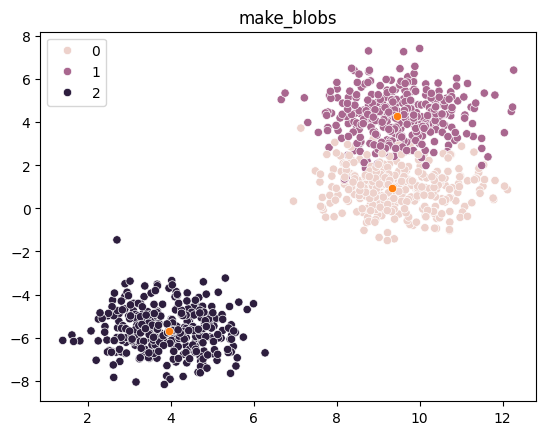

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import make_blobs
import seaborn as sns
X, y, centers = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=4, return_centers=True)
plt.title("make_blobs")
sns.scatterplot(x=X[:, 0],y=X[:, 1], hue = y)
sns.scatterplot(x=centers[:,0], y= centers[:,1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# get k_means algorithm
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42, init='random', max_iter=100, n_init=1, verbose=True, algorithm='lloyd')

# fit and predict
km.fit(X_train)
y_pred = km.predict(X_test)

Initialization complete
Iteration 0, inertia 3653.4350204760476.
Iteration 1, inertia 1669.283109180487.
Iteration 2, inertia 1294.8156122635266.
Iteration 3, inertia 1218.5487193219315.
Iteration 4, inertia 1204.8128936954708.
Iteration 5, inertia 1202.7976288178247.
Converged at iteration 5: strict convergence.


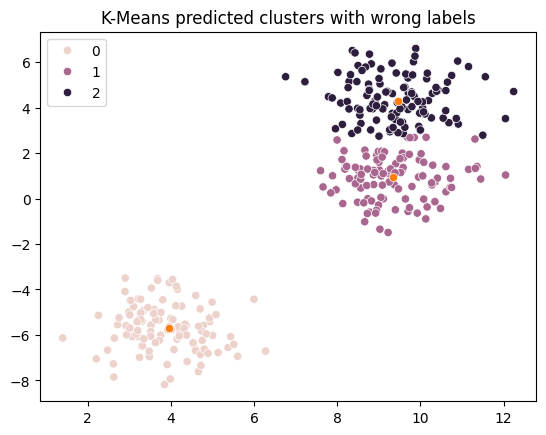

In [4]:
plt.title('K-Means predicted clusters with wrong labels')
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1], hue = y_pred)
sns.scatterplot(x=centers[:,0], y= centers[:,1])
plt.show()

In [5]:
print("predicted centers: \n",km.cluster_centers_)
print("\nactual centers: \n",centers)

predicted centers: 
 [[ 3.90570041 -5.60766833]
 [ 9.55520524  1.05497192]
 [ 9.50092663  4.37218367]]

actual centers: 
 [[ 9.34059678  0.94464498]
 [ 9.4536872   4.29631987]
 [ 3.95457649 -5.67821009]]


In [6]:
mapping = {0: 1, 1: 2, 2: 0}
y_pred = [mapping[label] for label in y_pred]

# accuracy
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.00909090909090909


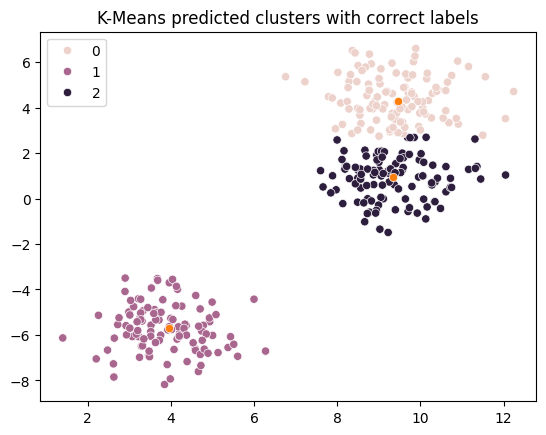

In [7]:
# plot
plt.title('K-Means predicted clusters with correct labels')
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1], hue = y_pred)
sns.scatterplot(x=centers[:,0], y= centers[:,1])
plt.show()

In [ ]:
cust = pd.read_csv("C://Users//91915//Desktop//Prodigy @T-2//Datasets//Mall_Customers.csv")
cust.head()

In [ ]:
cust.info()

In [ ]:
print("Check for Null values: \n",cust.isnull().sum())

In [ ]:
# check duplicates
print("Check for duplicates: \n",cust.duplicated().sum())

In [ ]:
# create a copy of data
X = cust.copy()

# hist
X.hist()
plt.show()

In [ ]:
# get value counts
val_cnt = pd.value_counts(X["Gender"])
print(val_cnt)

# plot
plt.figure(figsize=(4,4))
plt.title("Pie Chart of Customer Gender")
plt.pie(val_cnt, labels=["Female","Male"], autopct='%1.1f%%', 
        shadow=True, colors=["orange","lightgreen"], explode=[0.1,0], startangle=40)
plt.show()

In [ ]:
# plot annual income vs spending score
plt.title("Scatter plot of Anaual Income vs Spending Score")
sns.scatterplot(x= X["Annual Income (k$)"], y=X["Spending Score (1-100)"], 
                hue = X["Gender"], palette= "viridis")
plt.show()

In [ ]:
# plot age vs spending score
plt.title("Scatter plot of Age vs Spending Score")
sns.scatterplot(x= X["Age"], y=X["Spending Score (1-100)"],
                hue=X["Annual Income (k$)"], palette="viridis")
plt.show()

In [ ]:
# plot age vs annual income
plt.title("Scatter plot of Age vs Annual Income")
sns.scatterplot(x= X["Age"], y=X["Annual Income (k$)"],
                hue=X["Spending Score (1-100)"], palette="viridis")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# drop Customer ID
X.drop("CustomerID", axis=1, inplace=True)

# label encode
encoder = LabelEncoder()
X["Gender"] = encoder.fit_transform(X["Gender"])

# scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# print transformed data
X = pd.DataFrame(X, columns=cust.columns.drop("CustomerID"))
X.head()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
class PerformKMeans:

    def __init__(self, X) -> None:
        self.X = X
        
    def get_cost_func(self, fit_cols, no_k = 10):

        # record inertia values in a list
        cost_function_values = []
        for k in range(1,no_k+1):
            # get k_means algorithm
            km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1, 
                    algorithm = 'lloyd', verbose=False, random_state=9)
            
            # fit
            dataset = self.X.loc[:,fit_cols]
            km.fit_predict(dataset)
            
            # get inertia
            inertia = km.inertia_
            cost_function_values.append(inertia)
            
        return cost_function_values
    
    def elbow_plot(self, cols, knos=10):
        cost_function = self.get_cost_func(cols, knos)
        plt.figure(figsize=(7,4))
        if len(cols) == 3:
            plt.title("Elbow plot for kmeans with {} , {}, {} columns".format(cols[0], cols[1], cols[2]))
        else:
            plt.title("Elbow plot for kmeans with {} and {}".format(cols[0],cols[1]))
        plt.plot(range(1,knos+1), cost_function, marker='o', linewidth=2, markersize=5)
        plt.xlabel("Number of clusters")
        plt.ylabel("Cost function")
        plt.grid()
        plt.show()
    
    def plot_clusters(self, fit_cols, k=5):

        if len(fit_cols) != 2:
            raise Exception("clusters can be plotted only for 2 features using this fucntion")

        # get k_means algorithm
        km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1, 
                    algorithm = 'lloyd', verbose=False, random_state=9)
            
        # fit
        dataset = self.X.loc[:,fit_cols]
        labels = km.fit_predict(dataset)
        centers = km.cluster_centers_

        # plot
        import matplotlib.pyplot as plt
        plt.title("Scatter plot for kmeans with {} vs {}".format(fit_cols[0],fit_cols[1]))
        sns.scatterplot(x= self.X.loc[:,fit_cols[0]], y= self.X.loc[:,fit_cols[1]], 
                hue = labels, palette= "viridis")
        sns.scatterplot(x=centers[:,0], y=centers[:,1], color = 'red')
        plt.show()
        
        return dataset, labels

  

In [ ]:
pkm = PerformKMeans(X)
feature_set1 = X.columns.drop(["Age","Gender"])
feature_set2 = X.columns.drop(["Gender", "Spending Score (1-100)"])
feature_set3 = X.columns.drop(["Gender", "Annual Income (k$)"])
feature_set4 = X.columns.drop(["Gender"])

In [ ]:
pkm.elbow_plot(feature_set1, knos=30)

In [ ]:
dataset1, labels1 = pkm.plot_clusters(feature_set1, k=6)

In [ ]:
pkm.elbow_plot(feature_set3, knos=30)

In [ ]:
dataset2, labels2 = pkm.plot_clusters(feature_set3, k=6)

In [ ]:
pkm.elbow_plot(feature_set2, knos=30)

In [ ]:
dataset3, labels3 = pkm.plot_clusters(feature_set2, k=6)

In [ ]:
pkm.elbow_plot(feature_set4, knos=30)

In [ ]:
km = KMeans(n_clusters=6, init='random', max_iter=100, n_init=1, 
                    algorithm = 'lloyd', verbose=False, random_state=42)

# fit
dataset = X.loc[:,feature_set4]
labels = km.fit_predict(dataset)
centers = km.cluster_centers_
inertia = km.inertia_

# print results
print("inertia: ", inertia)
print("centers: \n", centers)

In [ ]:
# plot 3D Cluster
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text("3D plot of clusters")
ax.scatter3D(X.iloc[:, 1], X.iloc[:, 2], X.iloc[:, 3], c=labels)
ax.set_xlabel(X.columns[1])
ax.set_ylabel(X.columns[2])
ax.set_zlabel(X.columns[3])
plt.show()

In [ ]:
pkm.plot_clusters(feature_set1, k=6)

In [ ]:
dataset1["label"]=labels1
dataset1